# **Исследование локального градиентного спуска | MPI interface for local gradient descend framework**

*Содиков М. 798 группа / Курс методов оптимизаций*

**Abstract**

Локальный градиентный спуск -- довольно новый, но мощный инструмент для оптимизации функций, схожих по природе и свойствам, но отличающихся по каким-либо параметрам, а также хранящимся и изменяющимся различными, но похожими способами. Легче всего сэмулировать подобный кейс в проблеме локальной оптимизации целевой функции на конечных устройствах пользователей с непрерывной передачей центральному серверу значения градиента в конкретной точке. В то же время сервер принимает и обрабатывает значения градиентов от большого количества пользователей. Цель всего этого -- уменьшить нагрузку на сервер, при это не перегрузив конечные устройства пользователей, но при этом правильно и эффективно считать градиент и искать таким образом минимумы быстро. Что примечательно, из последних работ в этой области (Peter Richtarik [2019] et al. и Naman Agarwal [2016]) показывают, что локальный градиентный спуск ищет минимум не только быстрее обычных градиентных методов (к примеру, того же стохастического градиентного спуска), но и в среднем быстрее большинства методов 1 и 2 порядков, что делает локальный градиентный спуск просто необходимым для использования, когда дело касается нескольких похожих функций для минимизации.

**Цель:** минимизировать значение функции $F(x) = \frac{1}{M}\sum_{i = 1}^{M} f_i (x)$.  

**Описание алгоритма:** локальный градиентный спуск, реализованный в файле loacal_grad.py, принимает на вход следующие аргументы:  


1) N - количество эпох, т.е. количество коммуникаций между сервером и клиентами  
2) H - количество шагов градиентного спуска в каждой эпохе (частота коммуникаций)  
3) $x_0$ - начальная точка  
4) $\gamma$ - коэффициент при градиентном шаге  
4) M градиентов  
  
Алгоритм возвращает все точки, отправленные клиентам за всё время его работы.  
  
Возьмем для начала в качестве функций $f_1(x), f_2(x), f_3(x)$ билинейные квадратичные формы, задаваемые матрицами:  
$A_1 = \quad \begin{pmatrix} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 3 \end{pmatrix} \quad$ 
$A_2 = \quad \begin{pmatrix} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 1 \end{pmatrix} \quad$ 
$A_3 = \quad \begin{pmatrix} 2 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 1 \end{pmatrix} \quad$

In [0]:
import numpy as np 
from matplotlib import pyplot as plt 

Заметим, что $\nabla f_i(x) = 2A_i x$, следовательно $L_i = 2 \cdot max\{\lambda_{i_j}\}$, где $\lambda_{i_j}$ - собственные числа $A_i$. Т.к. $A_i$ - диалгональные, то это просто есть максимум из чисел, стоящих на диагонали.  
Те же рассуждения работают для $F(x) = \frac{1}{M}\sum_{i = 1}^{M} f_i (x)$, только у нее  
$A = \frac{1}{3} \begin{pmatrix} 4 & 0 & 0 \\ 0 & 6 & 0 \\ 0 & 0 & 5 \end{pmatrix}$  
Поэтому для $F(x)$ получим $L = 4$.  
Выберем коэффициент $\gamma \leq \frac{1}{4LH}$. Пусть $H = 10$. Тогда $\frac{1}{4LH} = \frac{1}{160} > \frac{1}{200} = 0.005 =: \gamma$.

In [9]:
points = ! mpiexec -n 4 --allow-run-as-root python local_grad.py 100 10 '[1, 2, 3]' 0.005 '2*np.array([[1, 0, 0],[0, 2, 0],[0, 0, 3]])@x' '2*np.array([[1, 0, 0],[0, 2, 0],[0, 0, 1]])@x' '2*np.array([[2, 0, 0],[0, 2, 0],[0, 0, 1]])@x'
points = eval(points[0])
points

[array([1, 2, 3]),
 array([0.87527899, 1.63414561, 2.54618828]),
 array([0.7661133 , 1.33521594, 2.16102491]),
 array([0.67056287, 1.09096864, 1.83412543]),
 array([0.58692959, 0.89140081, 1.55667623]),
 array([0.51372714, 0.72833936, 1.32119692]),
 array([0.44965457, 0.59510629, 1.1213387 ]),
 array([0.39357319, 0.48624516, 0.95171315]),
 array([0.34448635, 0.3972977 , 0.80774696]),
 array([0.30152166, 0.32462115, 0.68555861]),
 array([0.26391557, 0.26523911, 0.58185377]),
 array([0.23099975, 0.21671967, 0.49383641]),
 array([0.20218923, 0.17707575, 0.4191335 ]),
 array([0.17697199, 0.14468378, 0.35573093]),
 array([0.15489986, 0.11821718, 0.30191931]),
 array([0.13558059, 0.09659204, 0.2562478 ]),
 array([0.11867084, 0.07892273, 0.21748505]),
 array([0.1038701 , 0.06448562, 0.18458596]),
 array([0.09091531, 0.05268944, 0.15666354]),
 array([0.07957626, 0.04305111, 0.13296495]),
 array([0.06965143, 0.03517589, 0.11285127]),
 array([0.06096443, 0.02874127, 0.09578019]),
 array([0.05336

Теперь непосредственно проверим качество выполнения.

In [0]:
A1 = np.array([
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 3]
])

A2 = np.array([
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
])

A3 = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
])

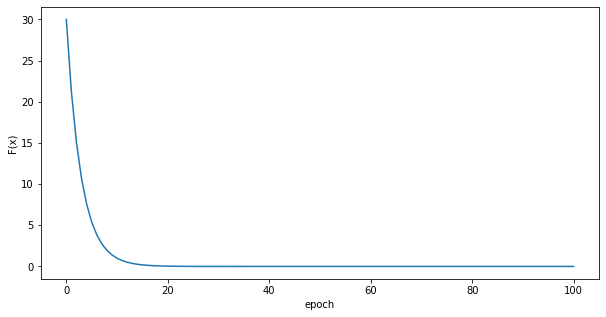

In [12]:
Y = [(p.transpose()@A1@p + p.transpose()@A2@p + p.transpose()@A1@p)/3 for p in points]
plt.figure(figsize=(10, 5))
plt.xlabel('epoch')
plt.ylabel('F(x)')
plt.plot(Y)

Как видим, наша функция минимизации очень быстро сходится к 0 (буквально за первые 15-20 эпох). 

**Принцип работы посредством MPI**

В local_grad.py мы эмулируем работу алгоритма для звеньев сревер-пользователь. 

Определим сначала понятие root-процесса или корневого процесса. Это понятие прямо наследуется из терминологии MPI и означает просто 0-й по счету процесс, из которого происходит получение всех значений градиентов на каждой эпохе. То есть нулевой процесс представляет собой сервер в наших обозначениях.

Для всех эпох алгоритм выполняет следующее.

Для начала в корневом процессе происходит коммуникация со всеми пользователями и сбор состояния функции (градиентов). Далее, происходит суммирование всех полученных градиентов и рассчет значения функции минимизации. 

Во всех остальных происходит ровно наоборот: рассчет значения конкретного шага и вычет от значения х конкретной функции на локальном устройстве пользователя. Далее каждый из устройств получает новое значение х от сервера и процесс оптимизации происходит  по новой. 

**Ссылки и улучшения алгоритма**

Вид функции минимизации был взят из работы Рихтарика 2019-го года. 

Также возможны модификации функции минимизации, которые исследованы в работах Naman Agarwal 2016-го года.

[1] https://arxiv.org/pdf/1611.01146.pdf

[2] https://arxiv.org/pdf/1909.04715.pdf